# Visualization and Analytics

In the previous section we loaded equity data in AWS s3 bucket into pandas dataframe. In this section we will explore some visualization and analytics we can perform on that data frame. Initially we will repeat some of the activities of the previous section to load the data, then we will plot the data using python's graphic libraries and demonstrate some basic analytics such as histogram and correlation

In [1]:
import boto3
import smart_open as so
import pandas as pd
bucket = 'rsdg-s3-bucket-fin-demo'

def get_s3_keys(pS3Client, pBucket):
    """Get a list of keys in an S3 bucket."""
    _keys = {}
    resp = pS3Client.list_objects_v2(Bucket=pBucket)
    for obj in resp['Contents']:
        _key = obj['Key']
        _size = obj['Size']
        _keys[_key] = _size
    return _keys

def build_df_from_s3(pBucket, pSession):
    _combined_equity_df = pd.DataFrame()
    for key in keysAndSizes:
        file = bucket + '/' +key
        single_equity_df = pd.DataFrame()
        single_equity_df = pd.read_csv(so.open('s3://' +  file, transport_params=dict(session= pSession) ))
        single_equity_df['Stock'] = key.replace('.txt','')
        _combined_equity_df = _combined_equity_df.append(single_equity_df, ignore_index=True)
    return _combined_equity_df


_session = boto3.Session(profile_name='fin-demo')
s3 = _session.client('s3')
keysAndSizes = get_s3_keys(s3, bucket)
combined_equity_df = build_df_from_s3(bucket,_session)
    

## Plot the chart for AAPL and GE

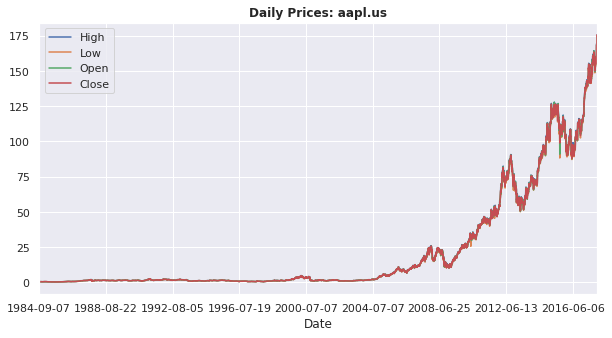

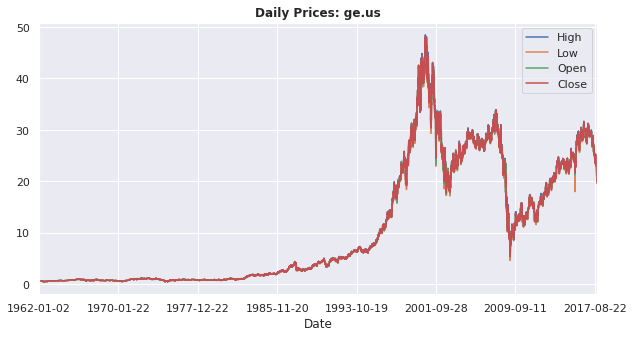

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

mpl.rcParams['figure.figsize'] = (10, 5) # use bigger graphs
def timeseries_plot(pDF, pStocks, pMetrics):
    ax = None
    for stock in pStocks:
        for metric in pMetrics:
            filteredDF = pDF[pDF.Stock == stock][['Date',metric]].copy()
            filteredDF.index = filteredDF['Date']
            filteredDF = filteredDF.sort_index()
            del filteredDF['Date']
            ax = filteredDF.plot(ax = ax)
            plt.title( "Daily Prices: " + stock, weight="bold");
    
timeseries_plot(combined_equity_df, ['aapl.us'], ['High', 'Low', 'Open', 'Close'])
timeseries_plot(combined_equity_df, ['ge.us'], ['High', 'Low', 'Open', 'Close'])

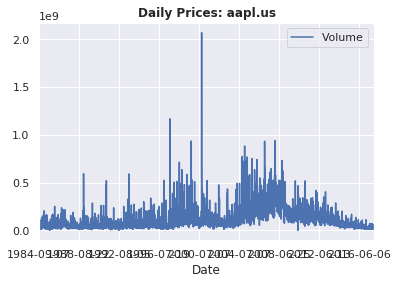

In [3]:
timeseries_plot(combined_equity_df, ['aapl.us'], ['Volume'])


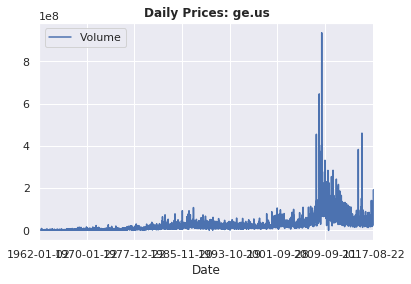

In [4]:
timeseries_plot(combined_equity_df, ['ge.us'], ['Volume'])


### Percent change

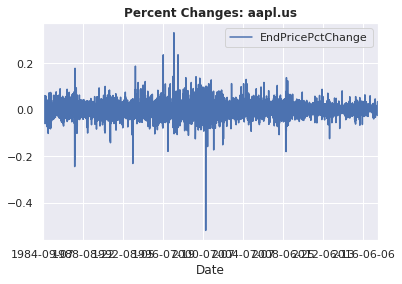

In [5]:
def plot_percent_change(pStock):
    filteredDF = combined_equity_df[combined_equity_df.Stock == pStock][['Date','Close']].copy()
    filteredDF.index = filteredDF['Date']
    filteredDF['EndPricePctChange'] = filteredDF['Close'].pct_change()
    filteredDF[['EndPricePctChange']].plot()
    plt.title( "Percent Changes: " + pStock, weight="bold");

plot_percent_change('aapl.us')

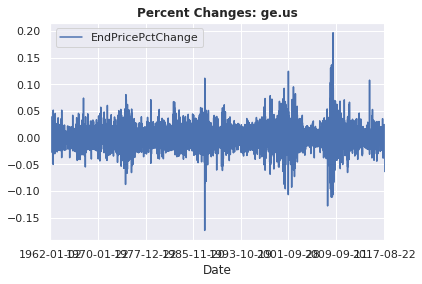

In [6]:
plot_percent_change('ge.us')

### Histogram of daily returns

Text(0.5, 1.0, 'Histogram: AAPL daily returns - 2016')

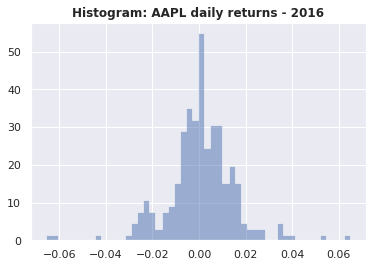

In [7]:
start_date = '2016-01-01'
end_date = '2016-12-31'
df_2016 = combined_equity_df[(combined_equity_df.Date >= start_date)&
                   (combined_equity_df.Date <= end_date) &
                   (combined_equity_df.Stock == "aapl.us")]
df_2016["Close"].pct_change().hist(bins=50, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Histogram: AAPL daily returns - 2016", weight="bold")

### QQ Plots 

Text(0.5, 1.0, 'Normal-QQ-plot: of AAPL daily returns in 2016')

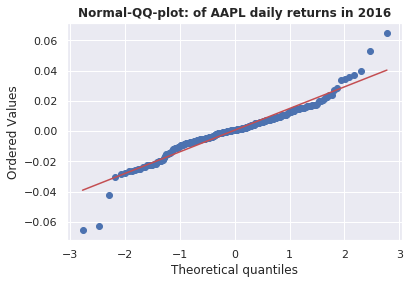

In [8]:
import scipy as scipy
_Q = df_2016['Close'].pct_change().dropna()
scipy.stats.probplot(_Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal-QQ-plot: of AAPL daily returns in 2016", weight="bold")

Text(0.5, 1.0, 'Student-QQ-plot: of AAPL daily returns in 2016')

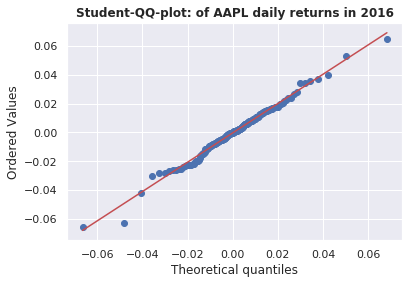

In [9]:
tdf, tmean, tsigma = scipy.stats.t.fit(_Q)
scipy.stats.probplot(_Q, dist=scipy.stats.t, plot=plt.figure().add_subplot(111), sparams=(tdf, tmean, tsigma))
plt.title("Student-QQ-plot: of AAPL daily returns in 2016", weight="bold")

### Related notebooks
* [00-Setup](./00_setup.ipynb) 
* [01-Process S3 using python](./01_Process_s3_files.ipynb)
* [02-Visualization and Analytics](./02_Visualization_and_Analytics.ipynb)
* [03-Risk Analytics](./03_Risk_Analytics.ipynb)
* [04-Exploring Firehose,Athena and Quicksight](./04_Exploring_Kinesis_Firehose.ipynb)
* [05-Athena and Quicksights](./05_Athena_Quicksight.ipynb)
* [06-Sagemaker to run the notebooks](./06_Sagemaker_jupyterlab.ipynb)
* [07_Transform stream data using Lambda](./07_Transform_lambda.ipynb)
* [08_Move data to Redshift using Glue](./08_Glue_Redshift.ipynb)
* [09_CI/CD Terrform with Travis CI](./09_Integrating_terraform_travisci.ipynb)